<a href="https://colab.research.google.com/github/khatrikajal/LGMVIP/blob/main/Prediction_using_Decision_Tree_Algorithm_LGMVIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTERMEDIATE LEVEL TASK 2**

---



---





## Prediction using Decision Tree Algorithm :




---



In [247]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [248]:
df=pd.read_csv('/content/Iris.csv')

In [249]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [250]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [252]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [253]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

Data Describing

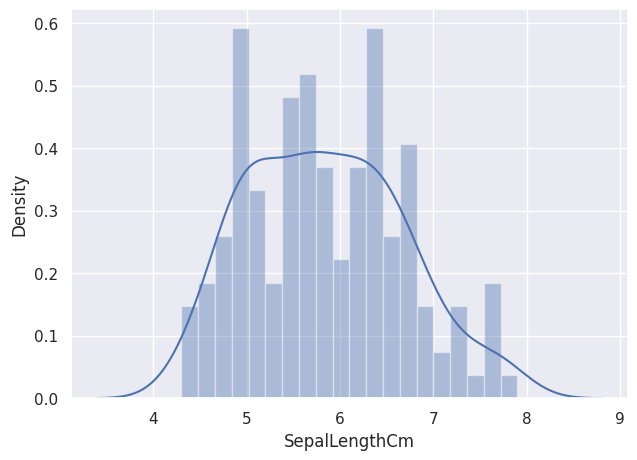

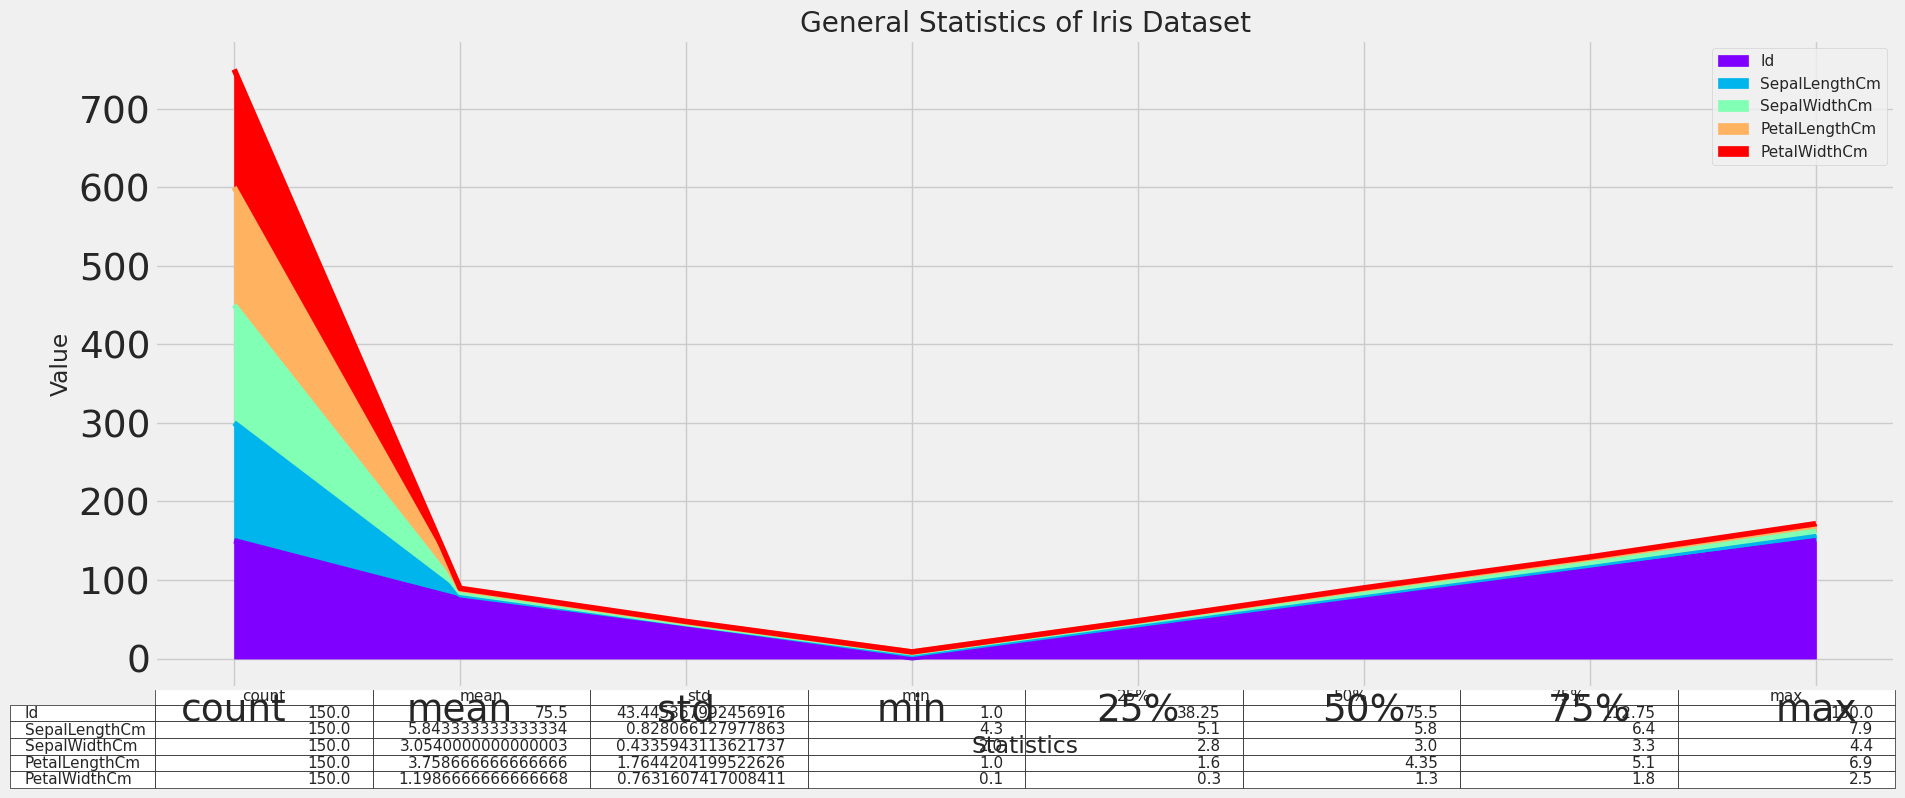

In [254]:
df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")
plt.show()

Joint plot

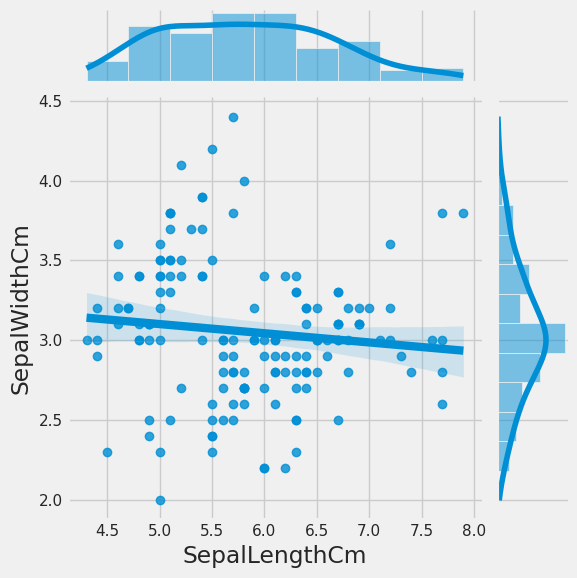

In [255]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, kind="reg")
plt.show()


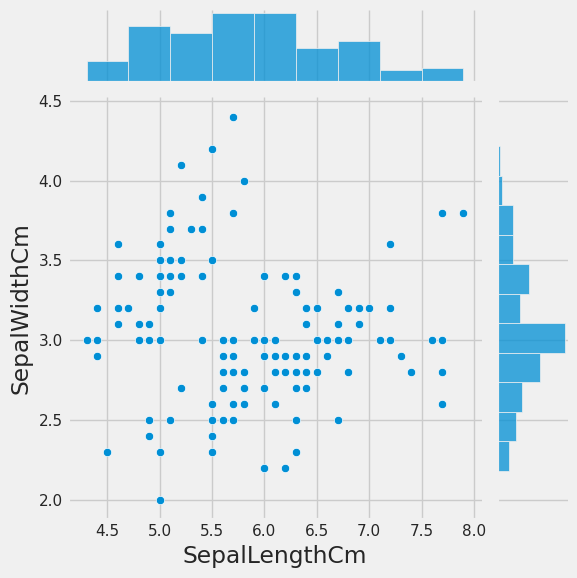

In [256]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df)
pass

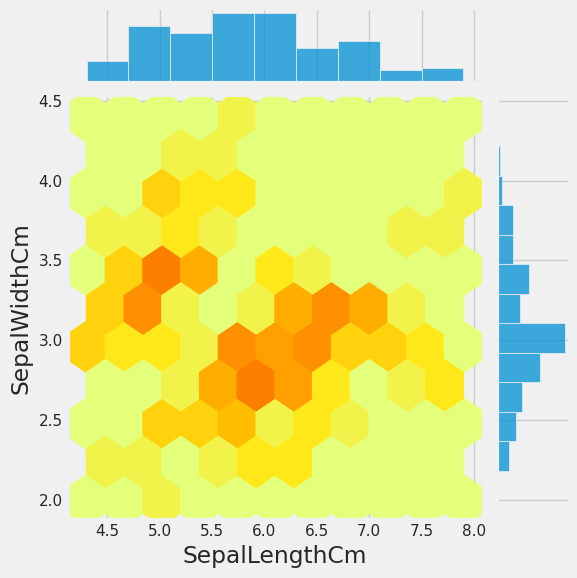

In [257]:
figure = sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', kind='hex', data=df, cmap='Wistia')


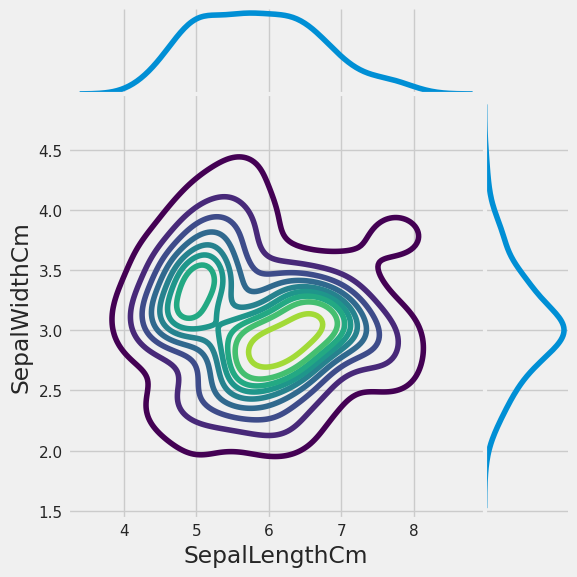

In [258]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, kind='kde', space=0, cmap='viridis')
plt.show()


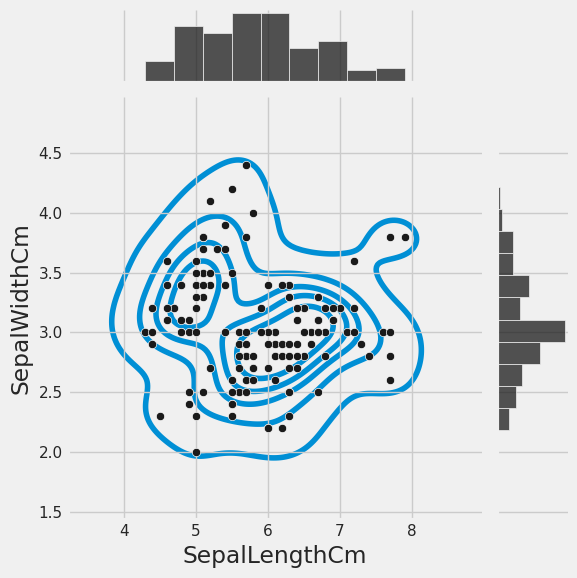

In [259]:
abc = sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, color='k')
abc.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.show()


Bar Plot

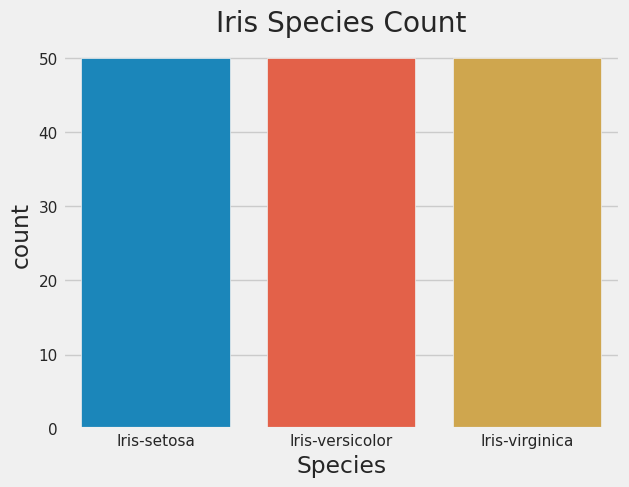

In [260]:
sns.countplot(x='Species', data=df)
plt.title('Iris Species Count')
plt.show()


Pie Chart

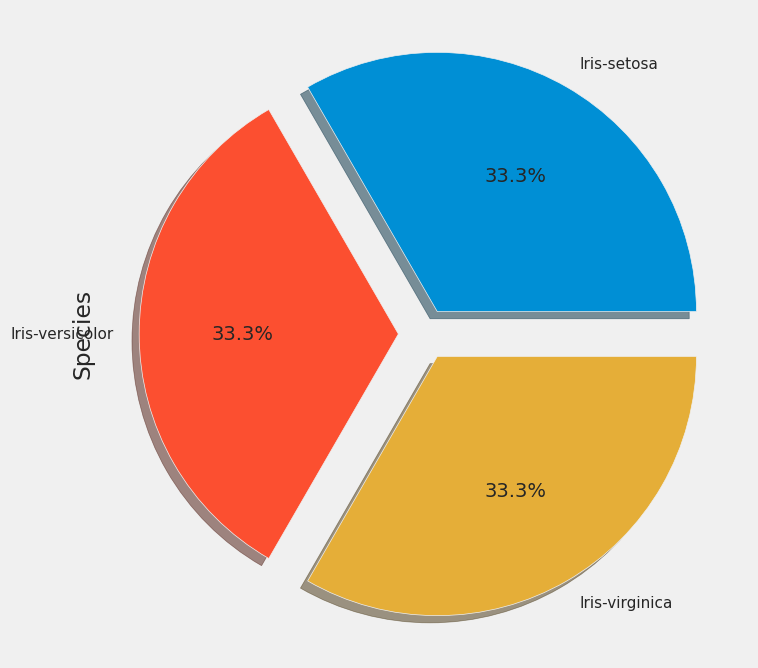

In [261]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

FacetGrid Plot

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline




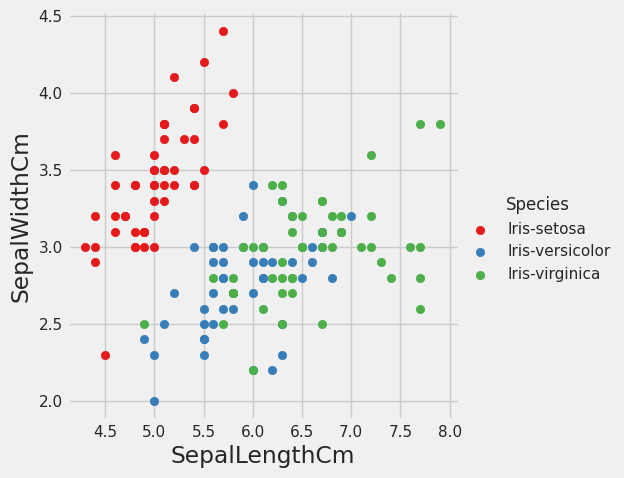

In [263]:

sns.FacetGrid(df, hue='Species', height=5, palette='Set1') \
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
    .add_legend()
plt.show()

Boxplot or Whisker plot

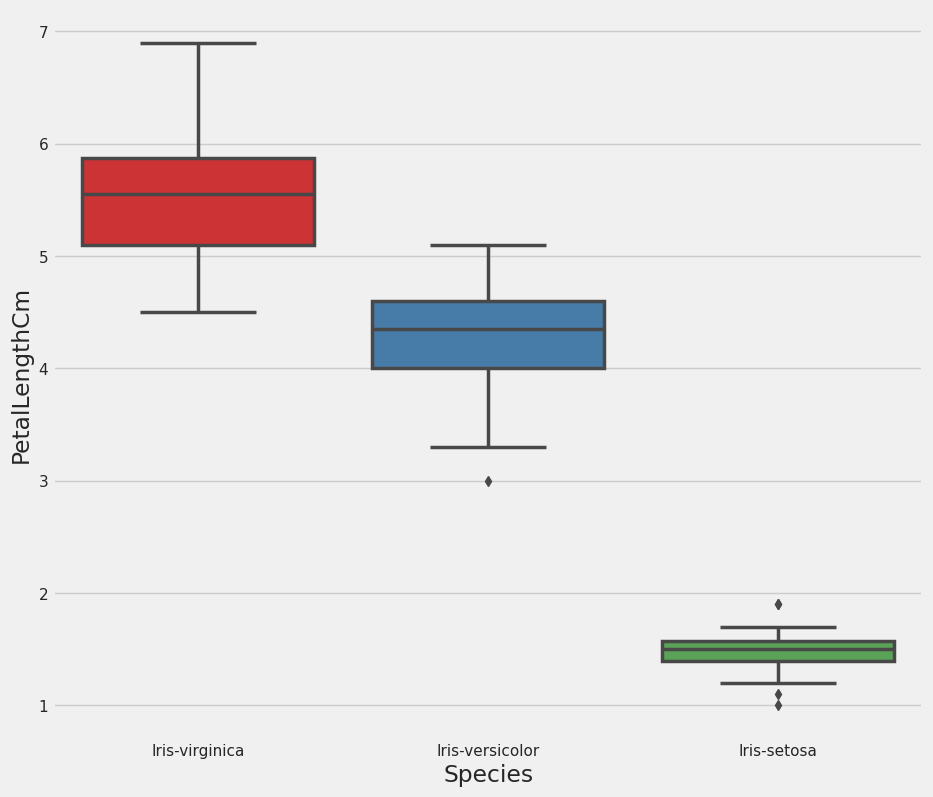

In [264]:
fig = plt.gcf()
fig.set_size_inches(10, 9)
fig = sns.boxplot(x='Species', y='PetalLengthCm', data=df, order=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], linewidth=2.5, palette='Set1')


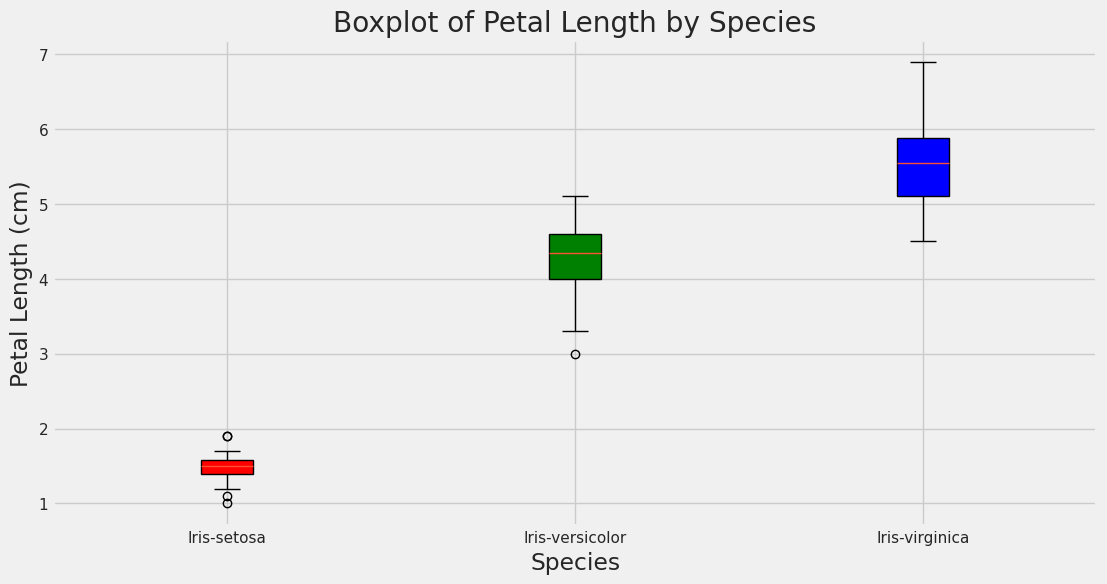

In [265]:
import matplotlib.pyplot as plt

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

fig, ax = plt.subplots(figsize=(12, 6))
boxprops = []
for species, group in df.groupby('Species'):
    box = ax.boxplot(group['PetalLengthCm'], positions=[list(colors.keys()).index(species)+1], patch_artist=True)
    box['boxes'][0].set_facecolor(colors[species])
    boxprops.append(box['boxes'][0])
ax.set_xticks(range(1, len(colors)+1))
ax.set_xticklabels(list(colors.keys()))
ax.set_title('Boxplot of Petal Length by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')
plt.show()


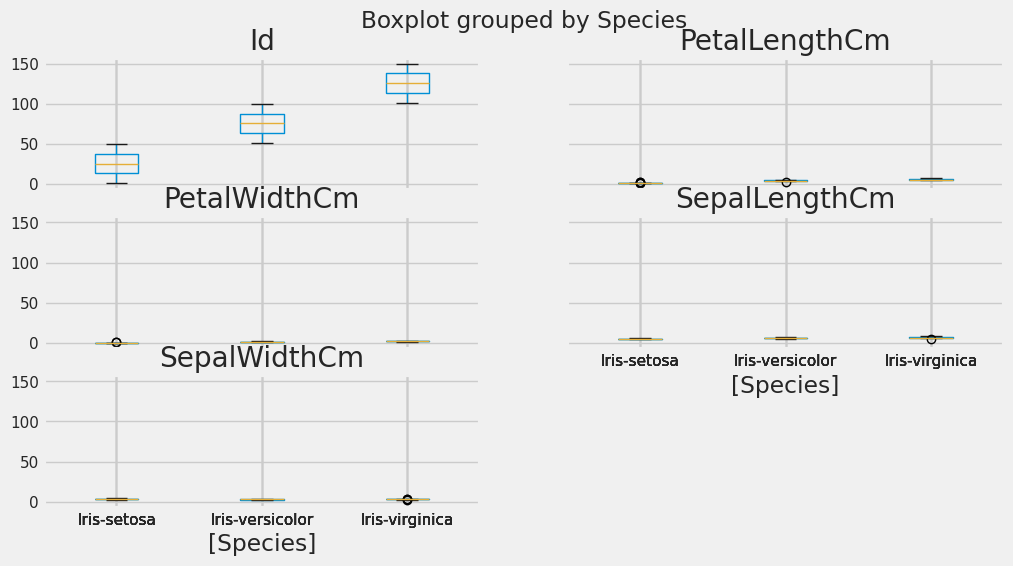

In [266]:
df.boxplot(by="Species", figsize=(12, 6))
pass

 Strip plot

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

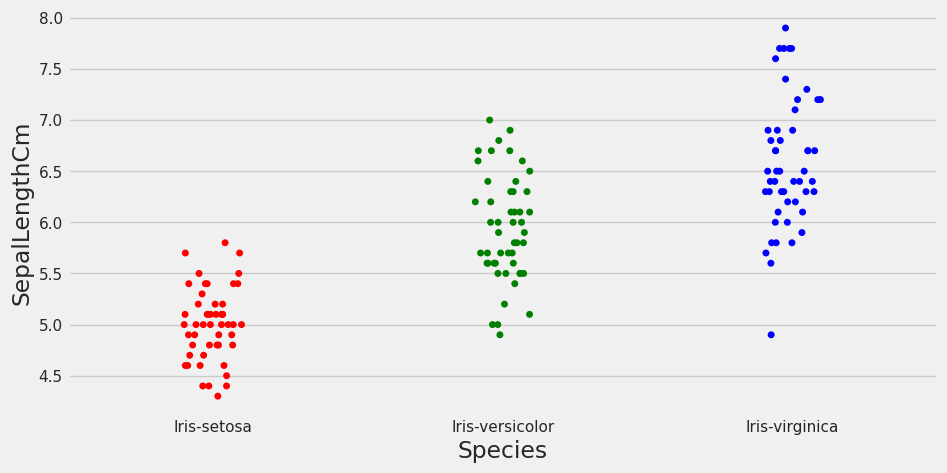

In [267]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.stripplot(x='Species', y='SepalLengthCm', data=df, jitter=True, edgecolor='g', palette=['red', 'green', 'blue'])


Combining Box and Strip Plots

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

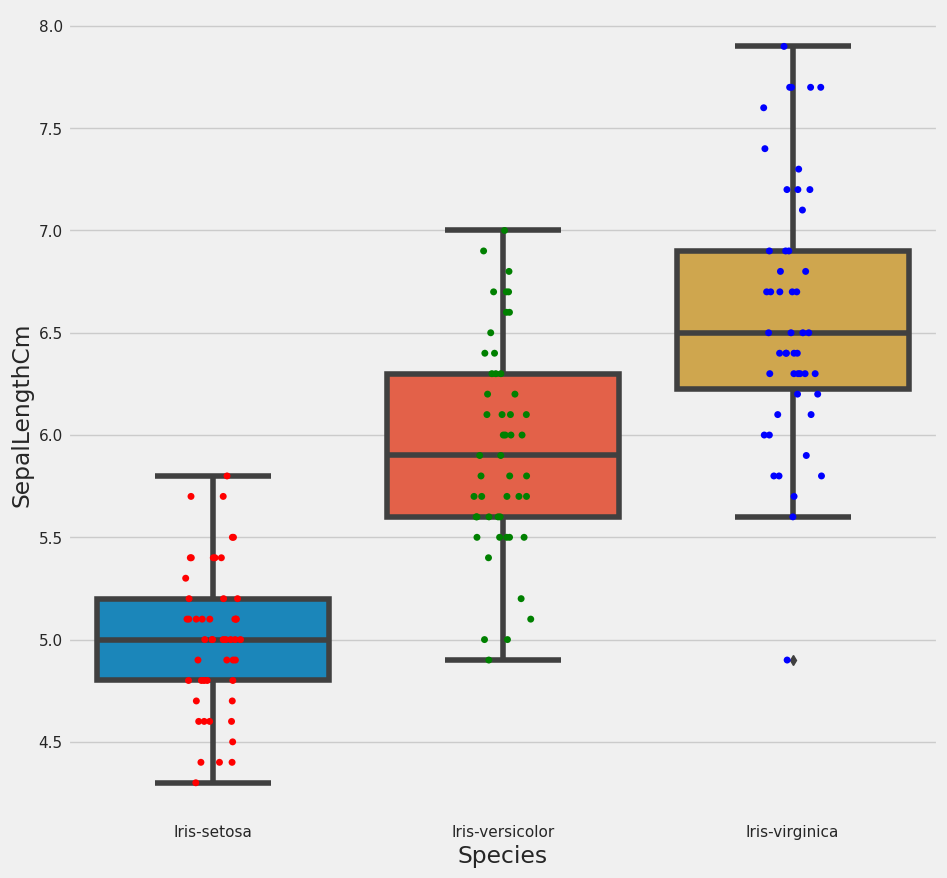

In [268]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
sns.stripplot(x='Species', y='SepalLengthCm', data=df, jitter=True, edgecolor='gray', palette=['red', 'green', 'blue'])


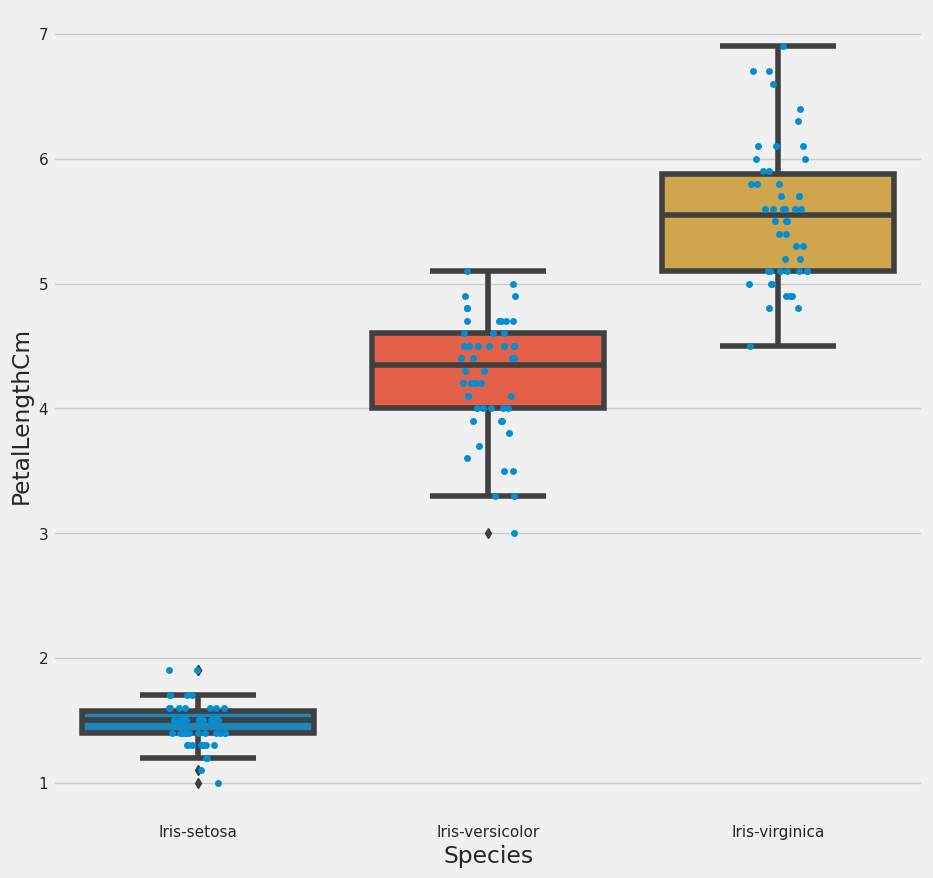

In [269]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x="Species", y="PetalLengthCm", data=df, ax=ax)
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray", ax=ax)

box_colors = ['yellow', 'red', 'green']
for i, artist in enumerate(ax.artists):
    artist.set_facecolor(box_colors[i])
    artist.set_edgecolor('black')

plt.show()


** Violin Plot**

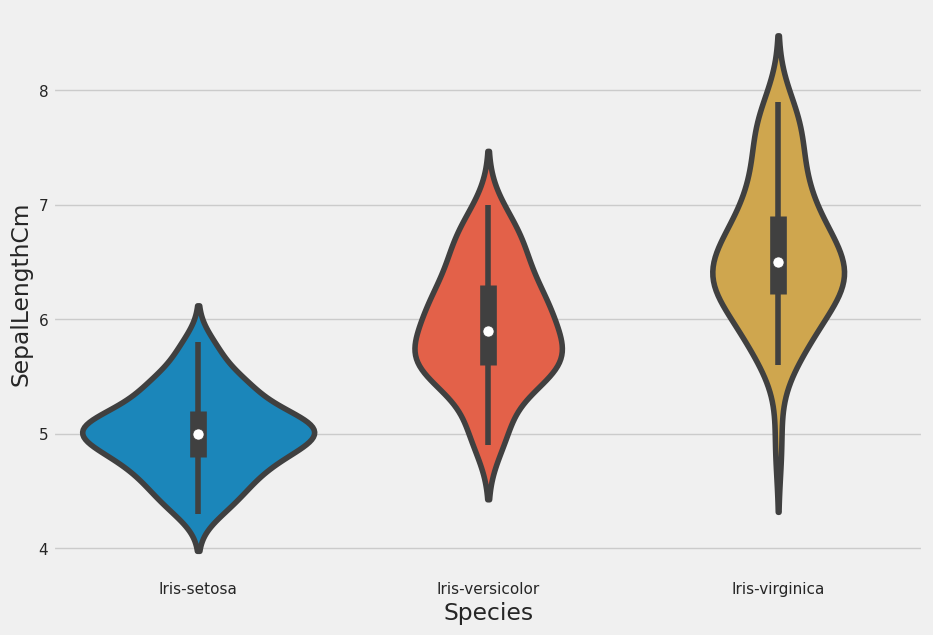

In [270]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=ax)

plt.show()


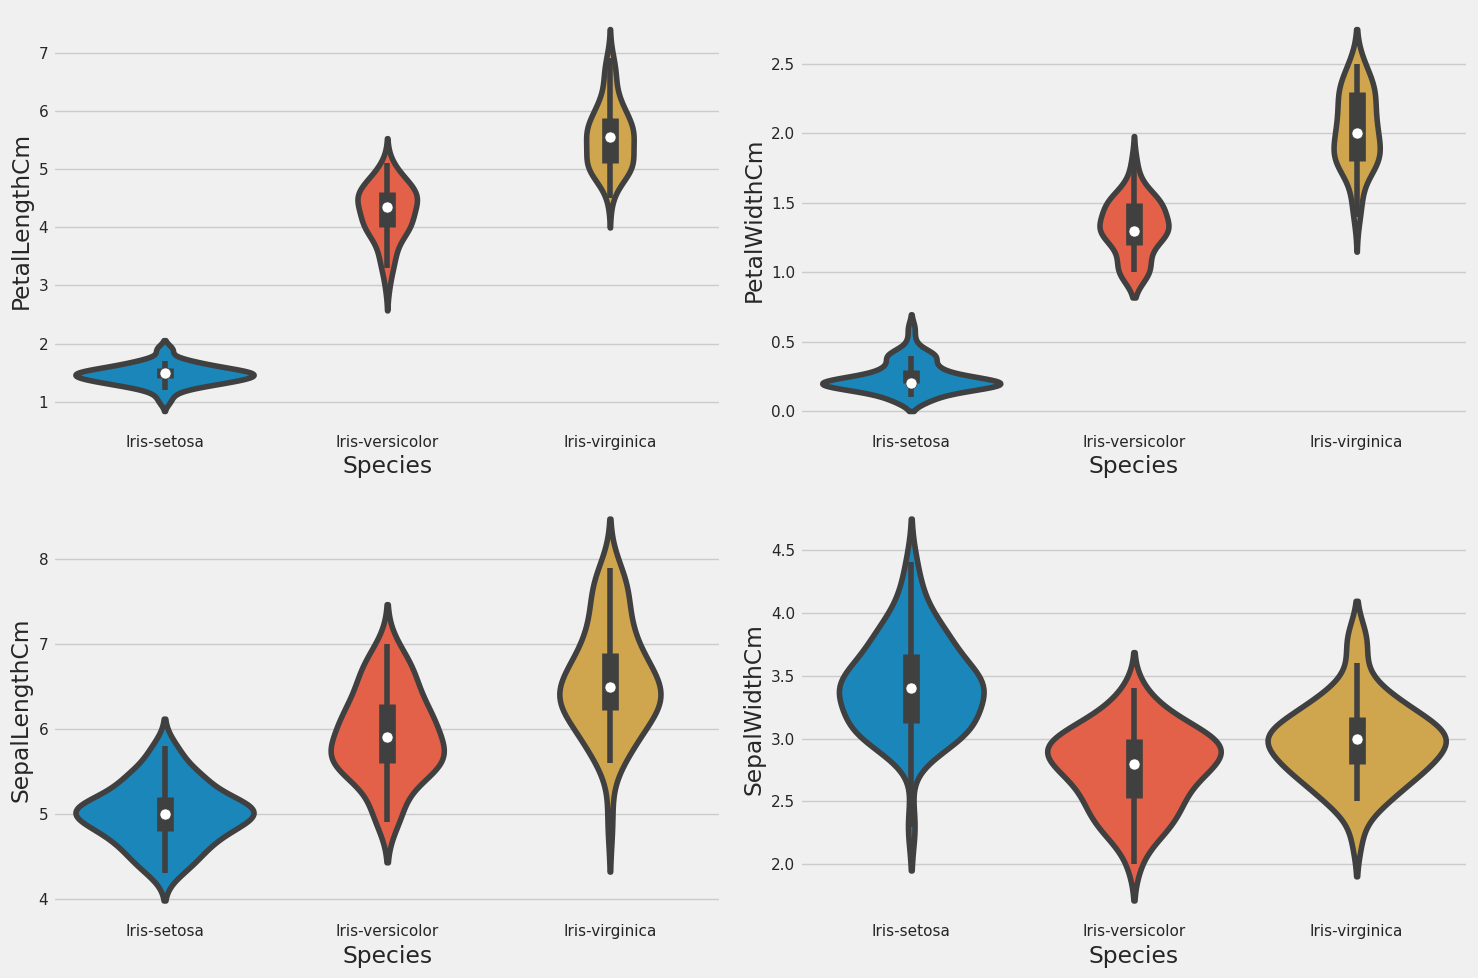

In [271]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(x='Species', y='PetalLengthCm', data=df, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=df, ax=axes[0, 1])
sns.violinplot(x='Species', y='SepalWidthCm', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()


 Pair Plot

In [272]:
df.drop('Id',axis=1,inplace=True)

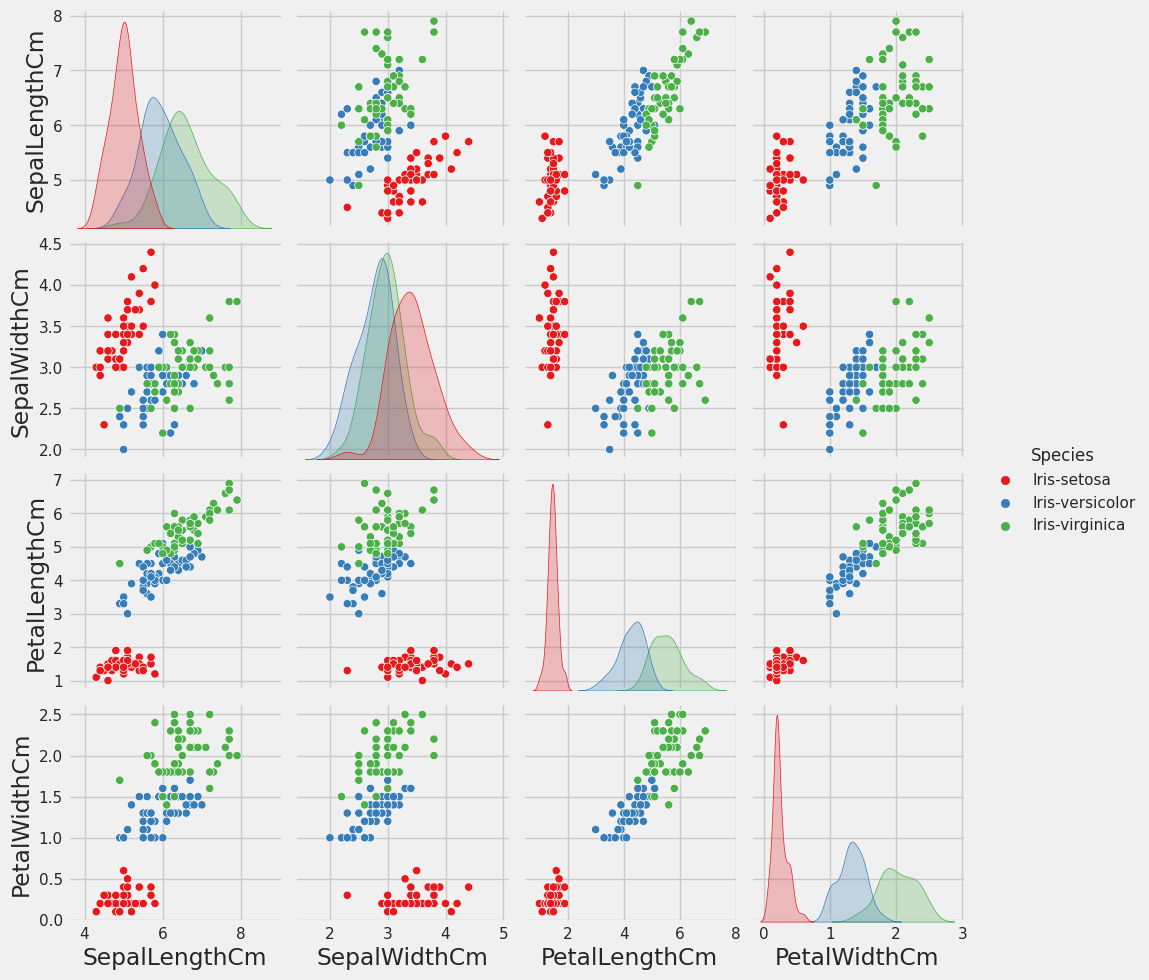

In [273]:
sns.pairplot(data=df, kind='scatter', hue='Species', palette='Set1')
plt.show()


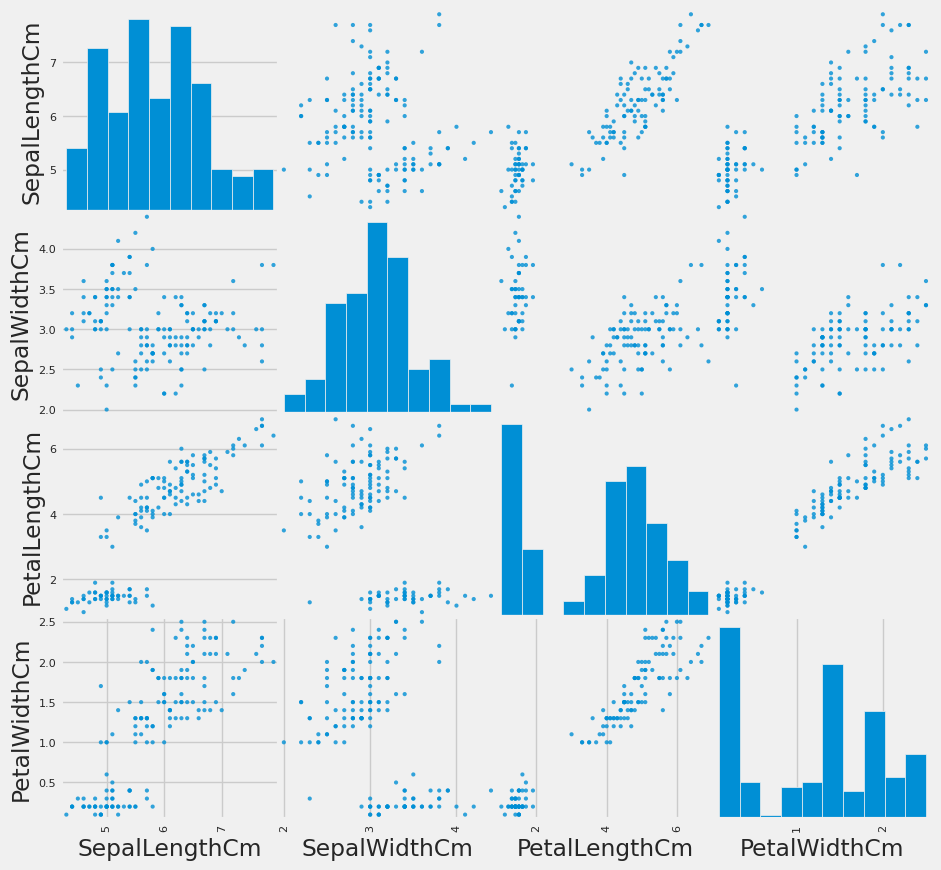

In [274]:
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10))
plt.show()


Heat map

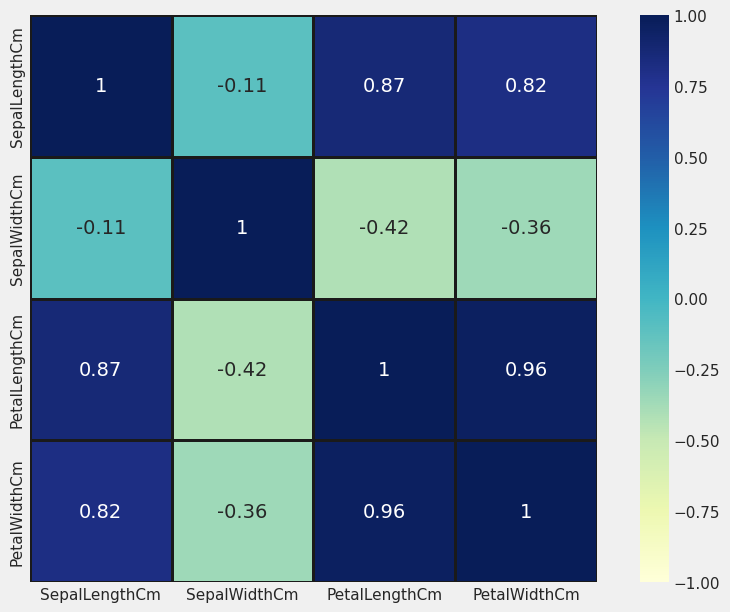

In [275]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)
plt.show()


Distribution plot

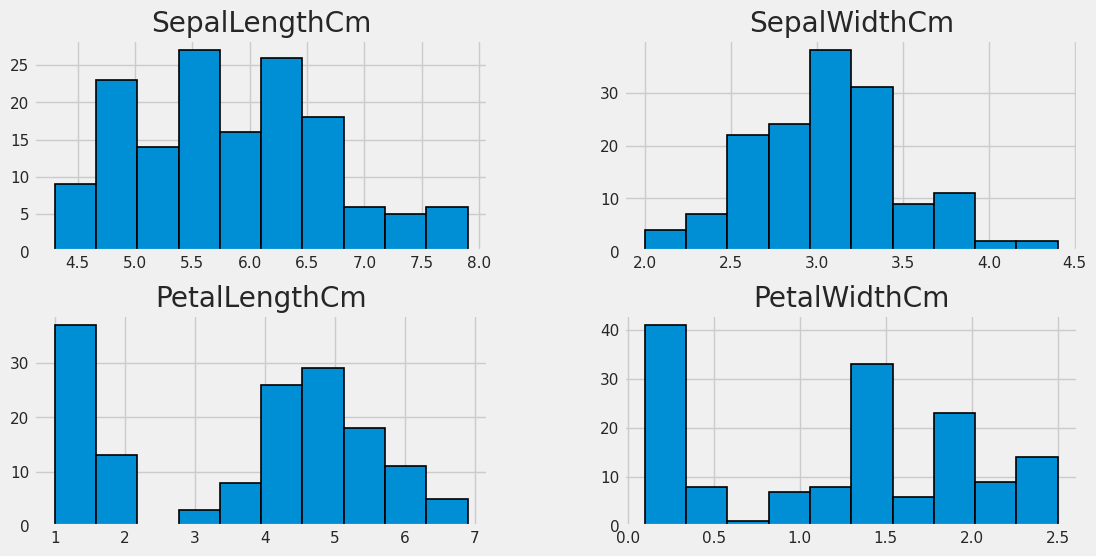

In [276]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

**Swarm plot**

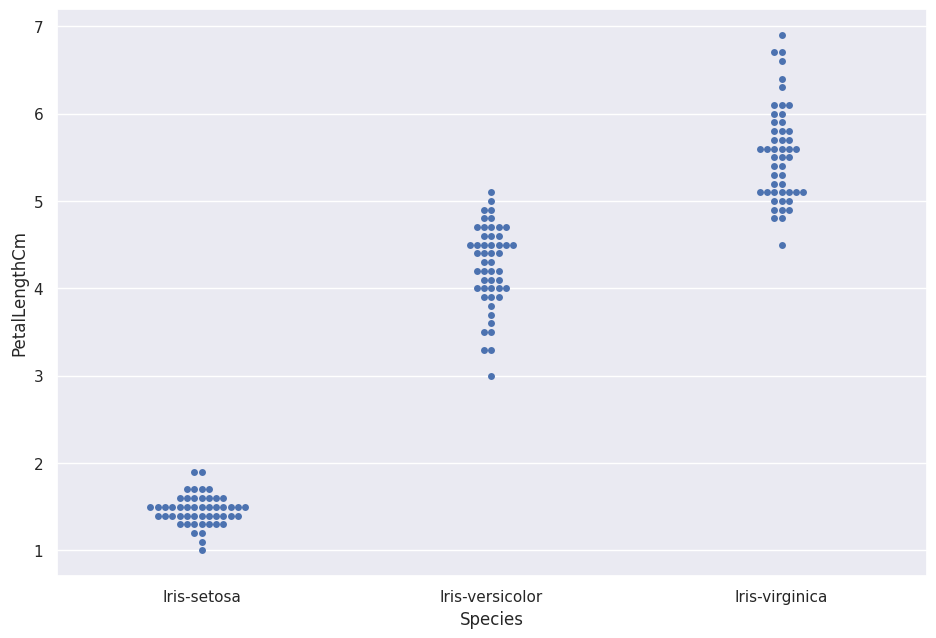

In [277]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Species", y="PetalLengthCm", data=df)

Box and Swarm plot combined

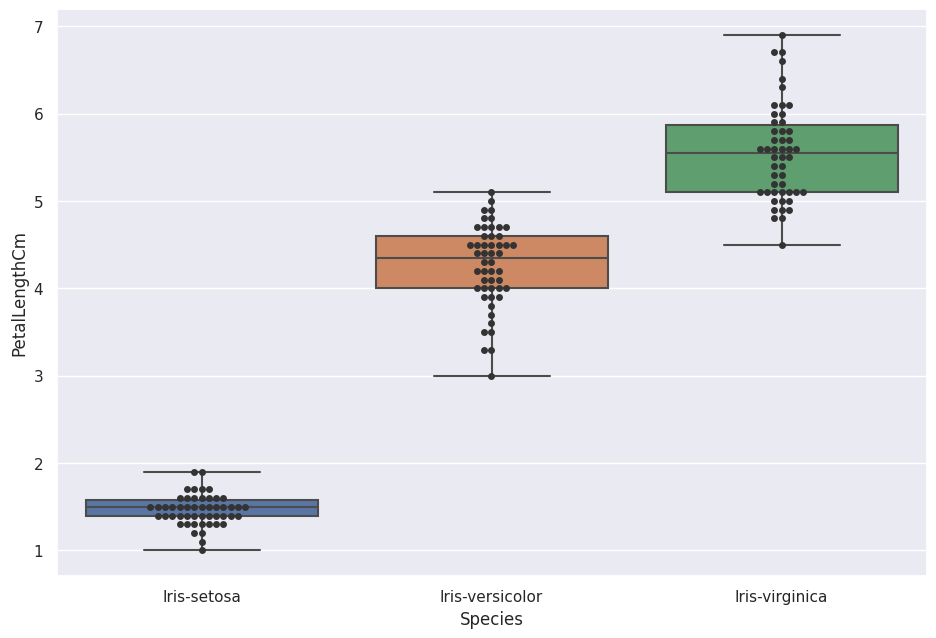

In [278]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x="Species", y="PetalLengthCm", data=df, whis=np.inf)
fig= sns.swarmplot(x="Species", y="PetalLengthCm", data=df, color=".2")

Swarm and Violin plot combined

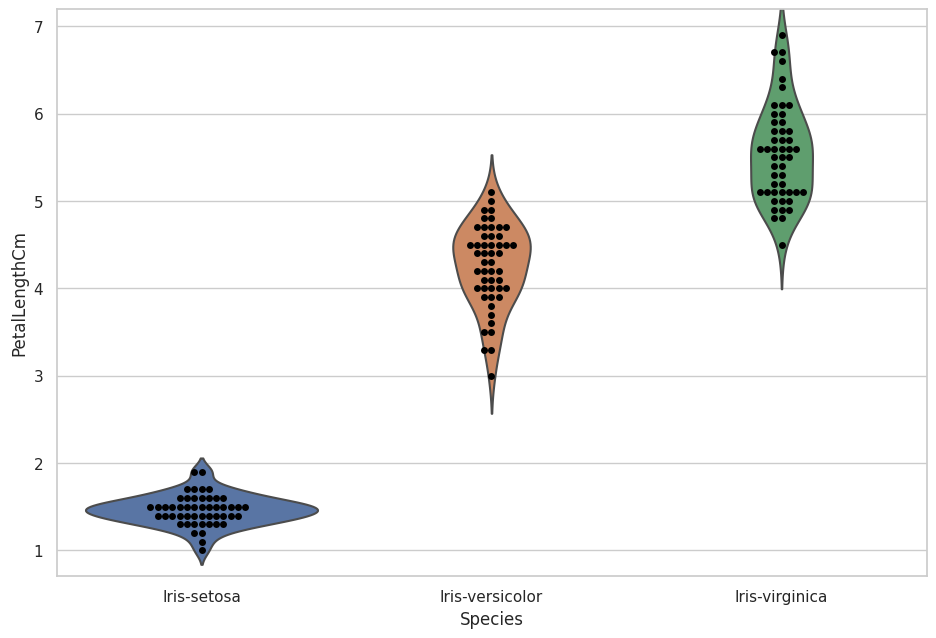

In [279]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="Species", y="PetalLengthCm", data=df, inner=None)
ax = sns.swarmplot(x="Species", y="PetalLengthCm", data=df,color="black", edgecolor="Red")


** Species based classification**

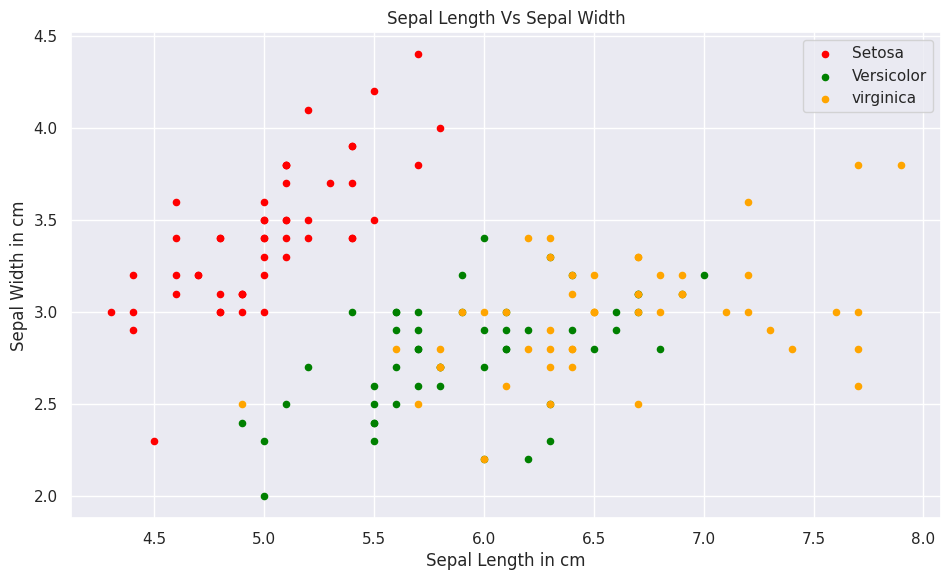

In [280]:
sns.set(style="darkgrid")
sc=df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label='Versicolor',ax=sc)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)

LM PLot

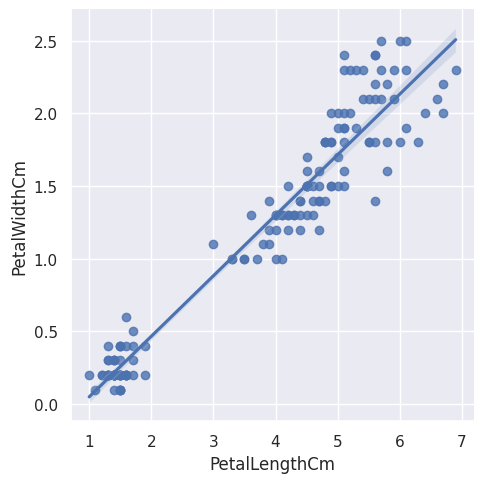

In [281]:
fig=sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",data=df)

FacetGrid

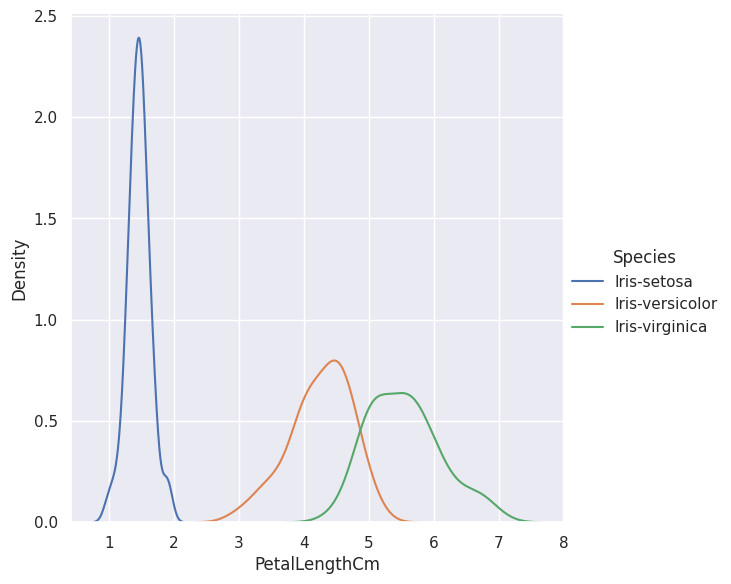

In [282]:
sns.FacetGrid(df, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.ioff()


Andrews Curve

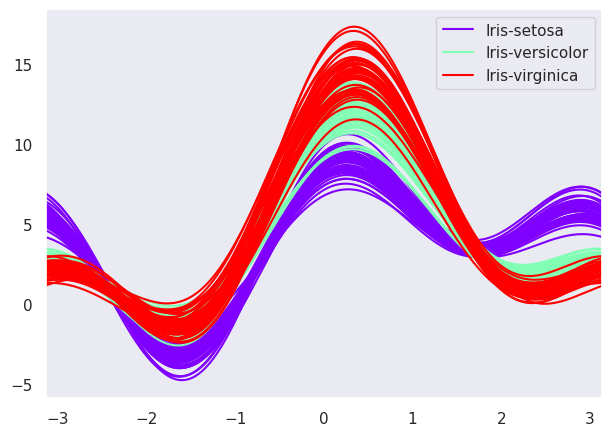

In [283]:
from pandas.plotting import andrews_curves
andrews_curves(df,"Species",colormap='rainbow')
plt.show()
plt.ioff()

Parallel coordinate plot

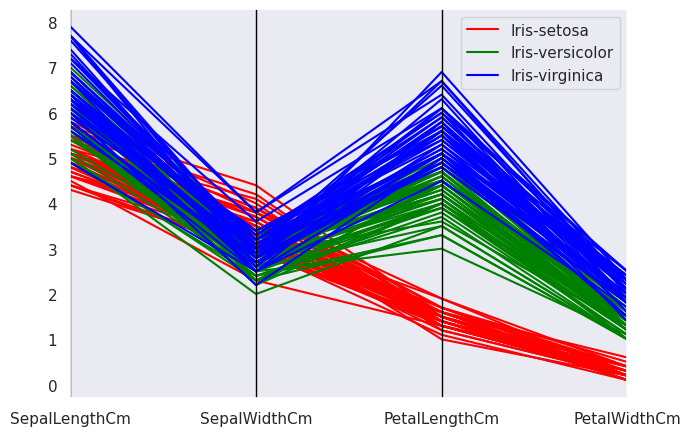

In [284]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Define a color palette
colors = ["red", "green", "blue"]

# Plot parallel coordinates with custom colors
parallel_coordinates(df, "Species", color=colors)

# Turn off interactive mode
plt.ioff()

# Show the plot
plt.show()


Radviz Plot

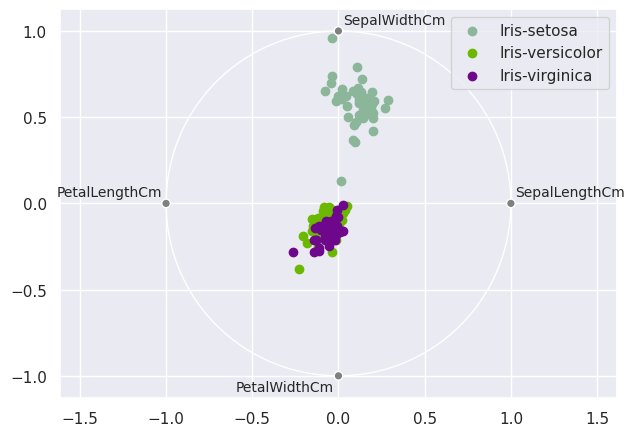

In [285]:
from pandas.plotting import radviz
import matplotlib.pyplot as plt

# Plot radviz chart
radviz(df, "Species")

# Turn off interactive mode
plt.ioff()

# Show the plot
plt.show()


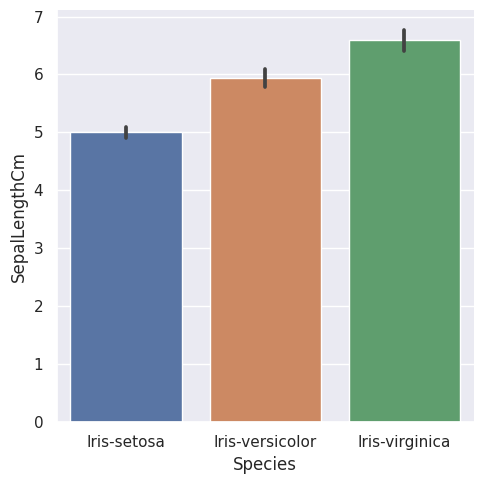

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot categorical plot
sns.catplot(x='Species', y='SepalLengthCm', data=df, kind='bar')

# Turn off interactive mode
plt.ioff()

# Show the plot
plt.show()



Boxen Plot

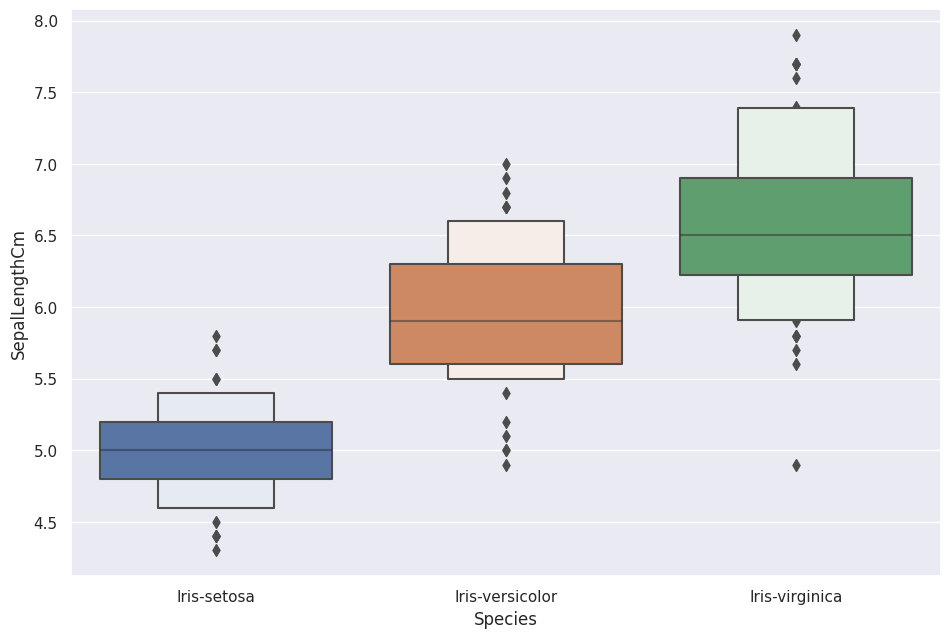

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the boxenplot
sns.boxenplot(x='Species', y='SepalLengthCm', data=df)

# Show the plot
plt.show()


Residual Plot

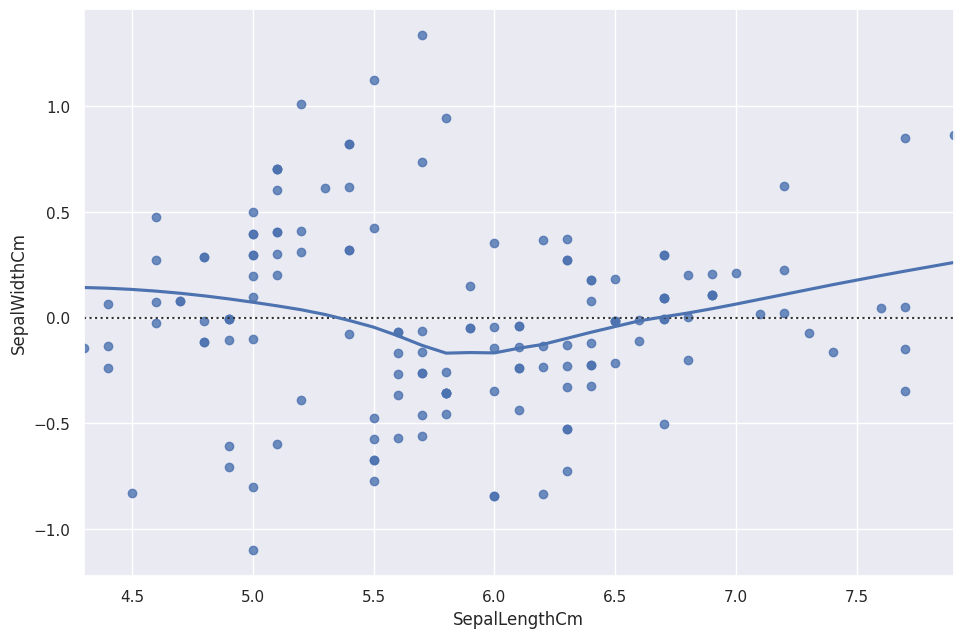

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the residplot
sns.residplot(x='SepalLengthCm', y='SepalWidthCm', data=df, lowess=True)

# Show the plot
plt.show()


Venn Diagram

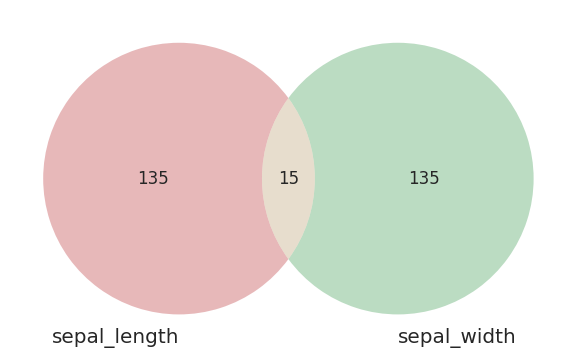

In [289]:
from matplotlib_venn import venn2
sepal_length = df.iloc[:,0]
sepal_width = df.iloc[:,1]
petal_length = df.iloc[:,2]
petal_width = df.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()


Spider Graph

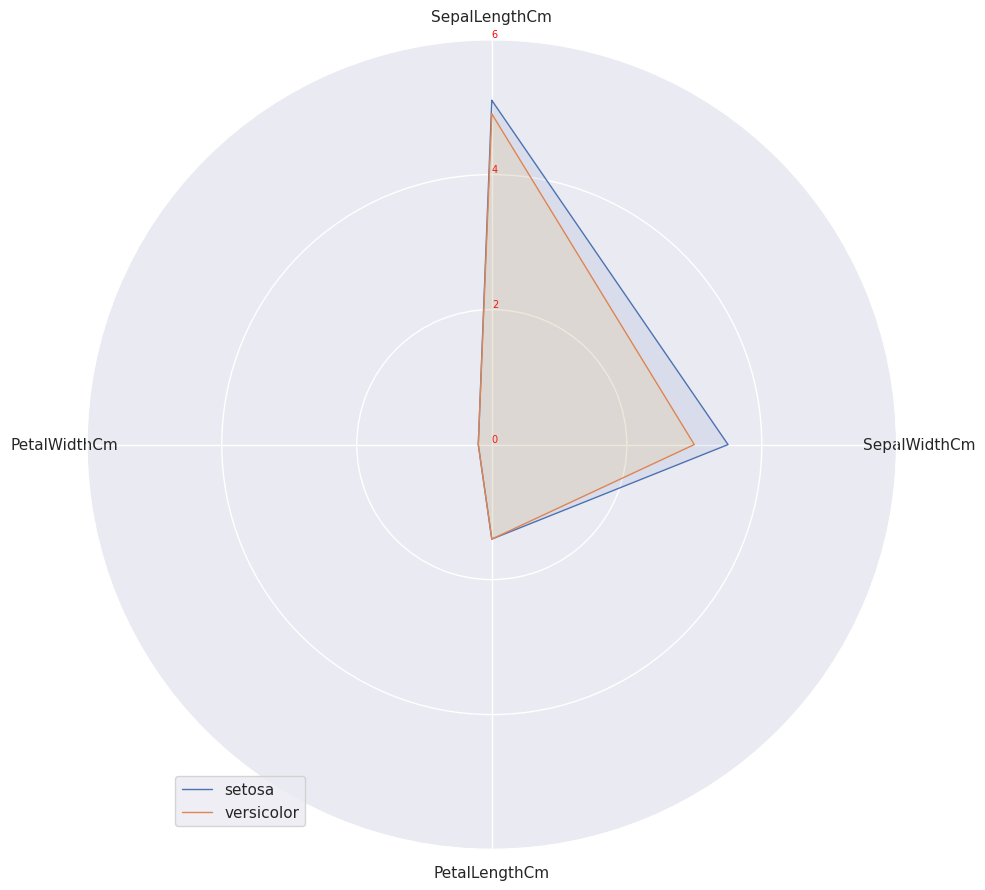

In [290]:
from math import pi
categories = list(df)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = df.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = df.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

Donut plot

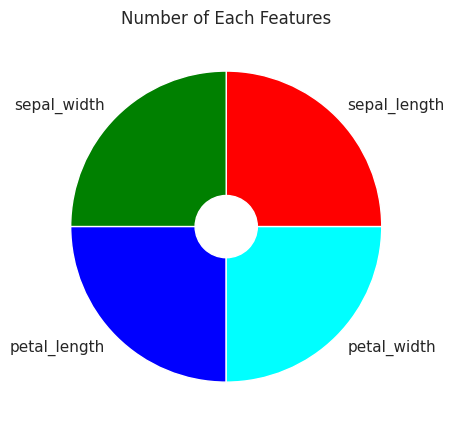

In [291]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

Cluster Map

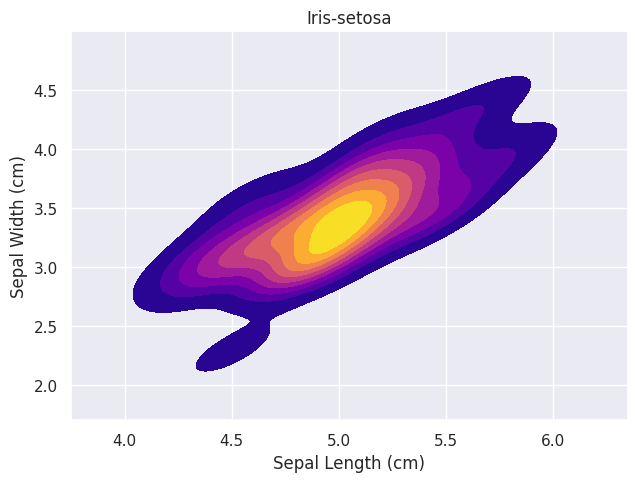

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for setosa species
setosa_df = df[df['Species'] == 'Iris-setosa']

# Create a KDE plot
sns.kdeplot(data=setosa_df, x='SepalLengthCm', y='SepalWidthCm', cmap='plasma', shade=True, shade_lowest=False)

# Set plot title and labels
plt.title('Iris-setosa')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Show the plot
plt.show()


Cluster Map

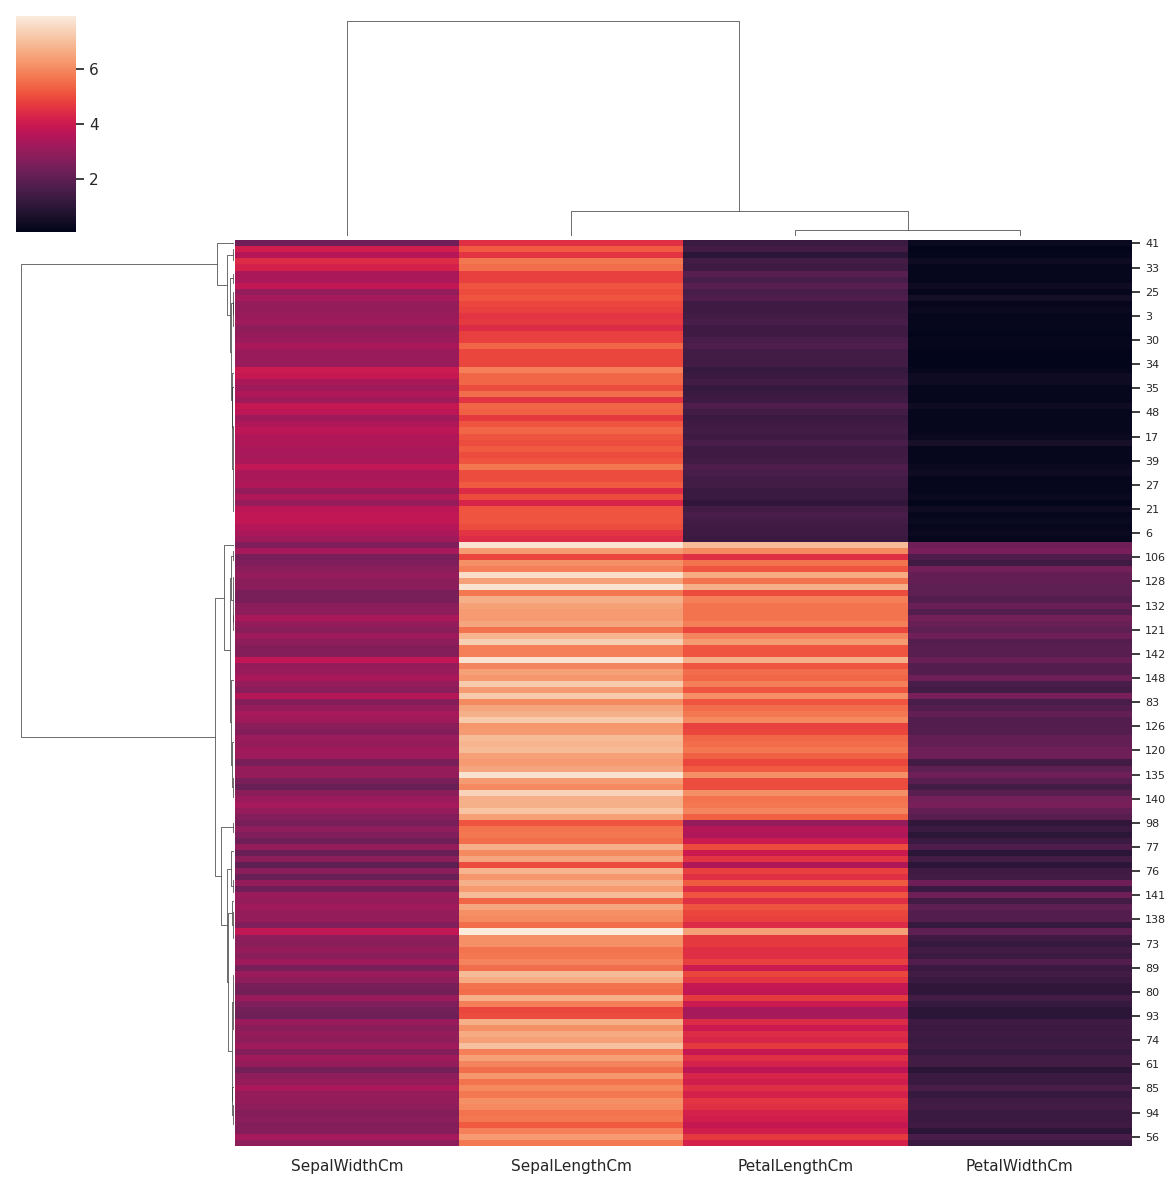

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the required columns from the DataFrame
df_subset = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Generate the cluster map
cg = sns.clustermap(df_subset, figsize=(12, 12), metric='correlation')

# Rotate the y-axis labels
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, size=8)

# Show the cluster map
plt.show()


Dashboard

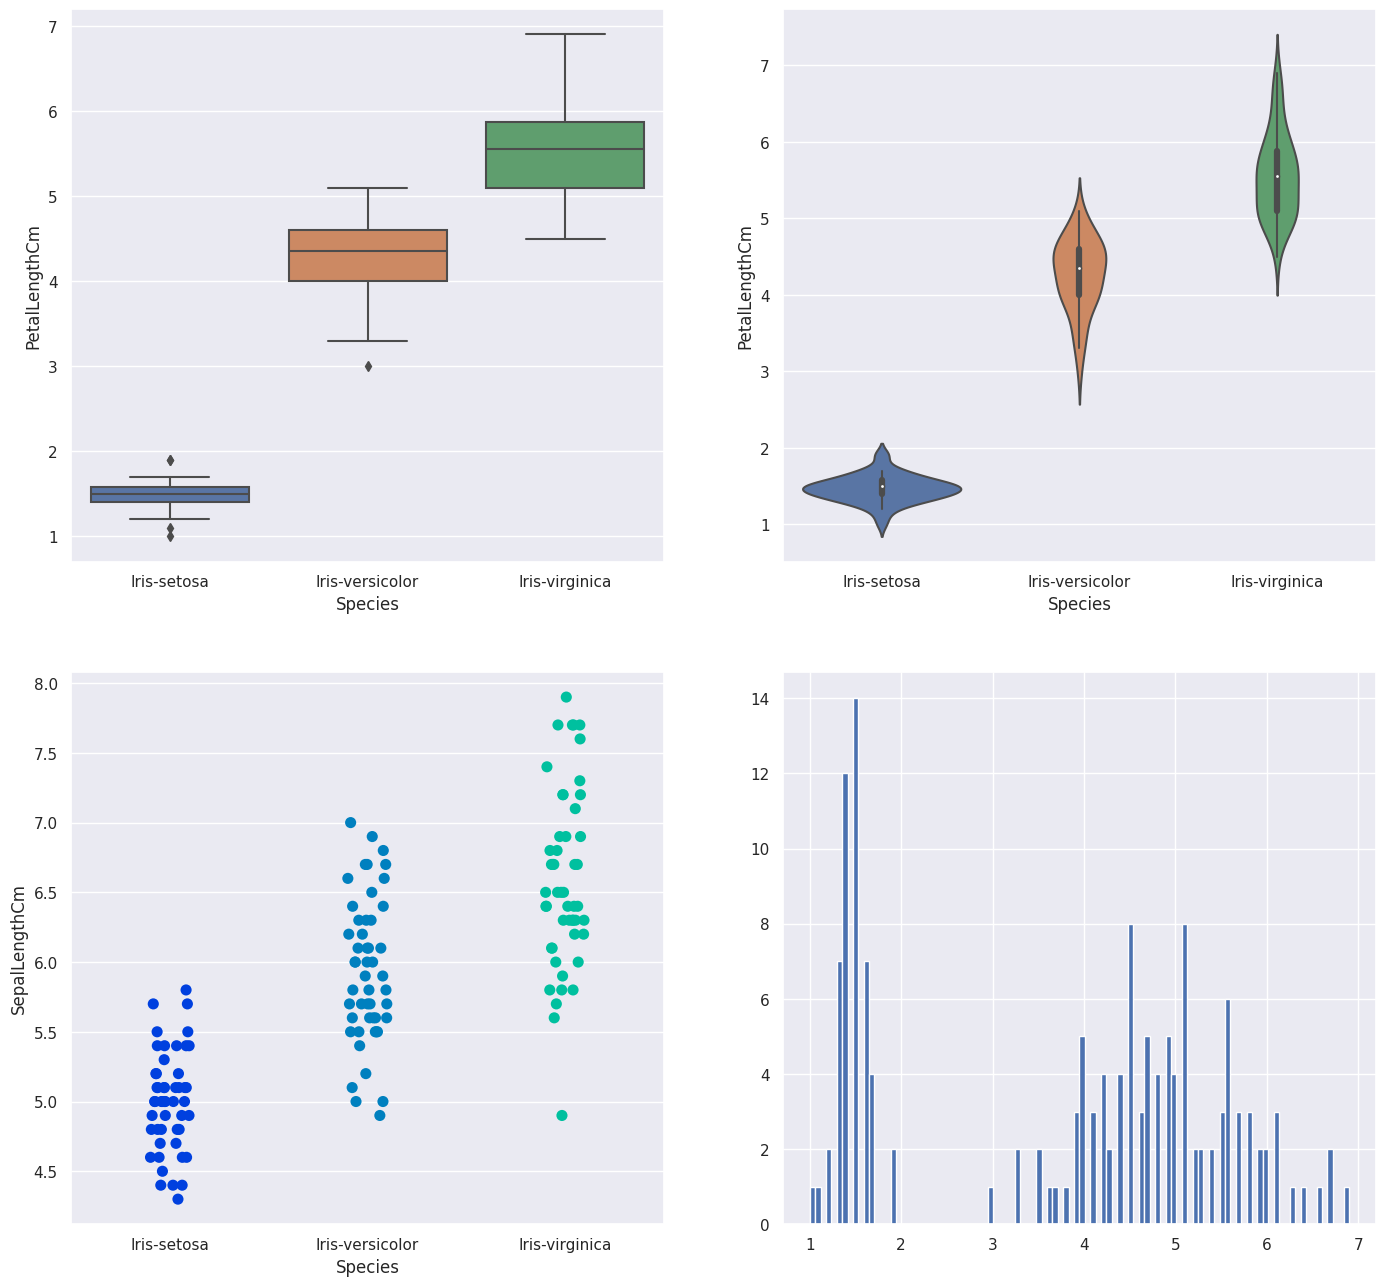

In [294]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(15,15))

k1=sns.boxplot(x="Species", y="PetalLengthCm", data=df,ax=axes[0,0])
k2=sns.violinplot(x='Species',y='PetalLengthCm',data=df,ax=axes[0,1])
k3=sns.stripplot(x='Species',y='SepalLengthCm',data=df,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v',ax=axes[1,0])
#axes[1,1].hist(iris.hist,bin=10)
axes[1,1].hist(df.PetalLengthCm,bins=100)
#k2.set(xlim=(-1,0.8))
plt.show()

Stacked Histogram

In [295]:
df['Species'] = df['Species'].astype('category')

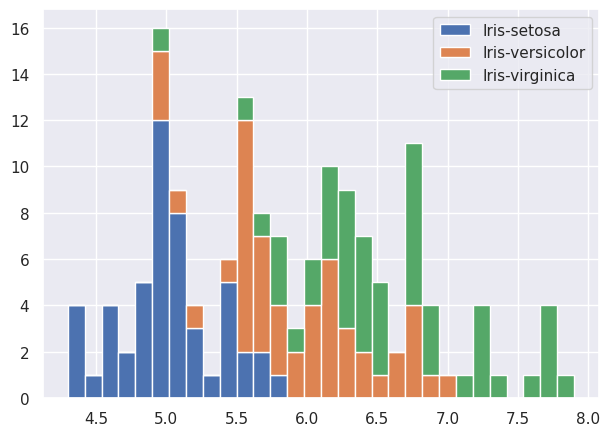

In [296]:
list1=list()
mylabels=list()
for gen in df.Species.cat.categories:
    list1.append(df[df.Species==gen].SepalLengthCm)
    mylabels.append(gen)
    
h=plt.hist(list1,bins=30,stacked=True,rwidth=1,label=mylabels)
plt.legend()
plt.show()

In [297]:
df.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

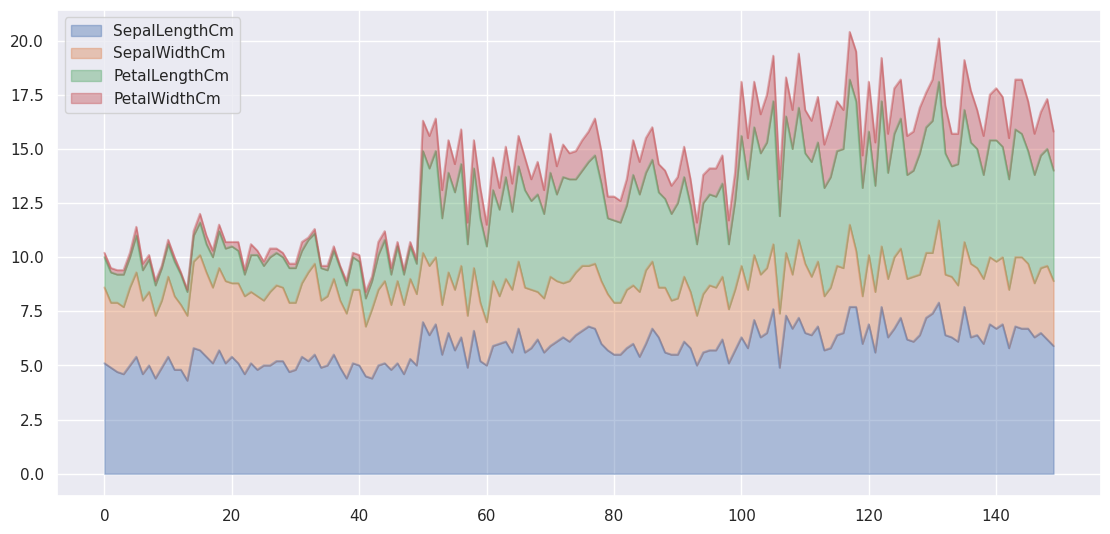

In [298]:
plt.show()

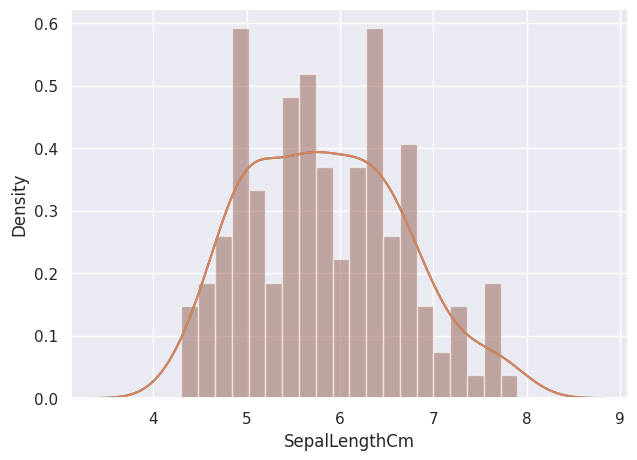

In [301]:
sns.distplot(df['SepalLengthCm'],kde=True,bins=20);
plt.show()

Cumulative Histogram

In [300]:
setosa=df[df['Species']=='Iris-setosa']
versicolor=df[df['Species']=='Iris-versicolor']
virginica=df[df['Species']=='Iris-virginica']

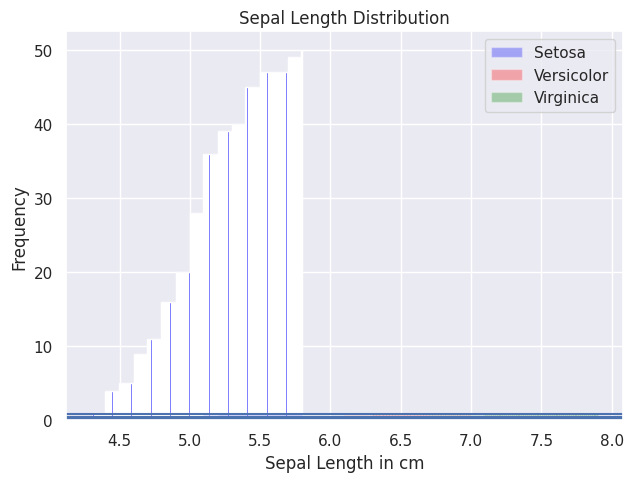

In [303]:
setosa['SepalLengthCm'].plot(kind='hist', bins=200, alpha=0.3, color='blue', cumulative=True, density=True)
versicolor['SepalLengthCm'].plot(kind='hist', bins=200, alpha=0.3, color='red', cumulative=True, density=True)
virginica['SepalLengthCm'].plot(kind='hist', bins=200, alpha=0.3, color='green', cumulative=True, density=True)

plt.title('Sepal Length Distribution')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Sepal Length in cm')

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2)
plt.show()
